In [ ]:
!pip install ipython-autotime
%load_ext autotime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math
import itertools
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.2f}'.format
data = pd.read_csv('new_file_emi.csv')

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=3a79ca4c3ef3a9c536ef6bd3a959094fdd0793d0ae661ba1b4a50c06feb2cffe
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
data.set_index('lead_id', inplace=True)
data = data[data['dmi_cibil_score'] > 399]
data.drop(['dmi_cibil_score'], axis = 1, inplace=True)
data = data[(data['salary'] > 6000) & (data['salary'] < 500000) & (~data.salary.isin([50000,100000,150000,200000]))]
original_data = data.copy()
print("sample count",len(data.index))

sample count 5412
time: 41.2 ms


sample count 5412
sample count 4996
loan_total_total:-  0.3770709120353541
emi_total_total:-  0.08909765875163787
model score : 0.05970638003341833


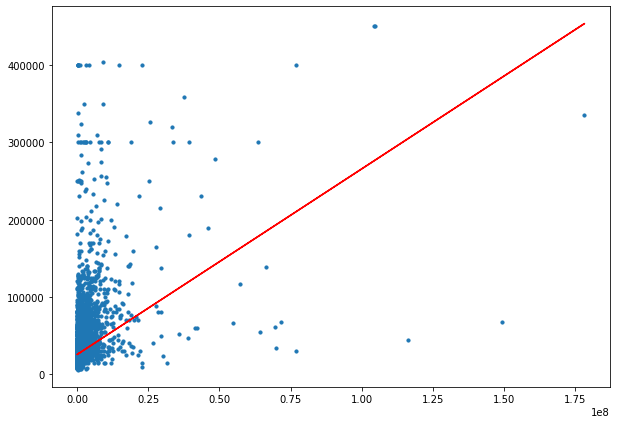

time: 733 ms


In [ ]:
data = original_data.copy()
print("sample count",len(data.index))
data['loan_total_total'] = data.filter(like='_loan_total').sum(axis=1)
data['loan_total_max'] = data.filter(like='_loan_total').max(axis=1)
data['loan_max_total'] = data.filter(like='_loan_max').sum(axis=1)
data['loan_max_max'] = data.filter(like='_loan_max').max(axis=1)
data['emi_total_total'] = data.filter(like='_emi_total').sum(axis=1)
data['emi_total_max'] = data.filter(like='_emi_total').max(axis=1)
data['emi_max_total'] = data.filter(like='_emi_max').sum(axis=1)
data['emi_max_max'] = data.filter(like='_emi_max').max(axis=1)
data = data[(data['loan_total_total']< 500000000) & (data['loan_total_total'] >= 1000)]
cols = data.columns[(data.columns.str.contains('_loan_')|data.columns.str.contains('_card_')|data.columns.str.contains('overdraft_'))]
data[cols] = data[cols].mask(data[cols] < 1000)
cols = data.columns[data.columns.str.contains('_emi_')]
data[cols] = data[cols].mask(data[cols] < 100)
print("sample count",len(data.index))
print("loan_total_total:- ",data['loan_total_total'].corr(data['salary']))
print("emi_total_total:- ",data['emi_total_total'].corr(data['salary']))
x_train = data[['loan_total_total']]
y_train = data[['salary']]
model = linear_model.RANSACRegressor(linear_model.LinearRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()
# data = data[['salary','loans_total_total','loans_total_max','loans_max_total','loans_max_max','housing_loan_max', 'housing_loan_total','emi_total_total','emi_total_max','emi_max_total','emi_max_max','housing_emi_max', 'housing_emi_total']]
# data.to_csv('with_total.csv')
backup_data = data.copy()

In [ ]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<=20000 else (1 if x<=40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
c2 = 'overdraft_max'
c = 0
for i in range(55,65,5):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(55,65,5):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(80,81,5):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(70,75,5):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(99,100,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(85,86,4):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(70,75,5):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(100,101,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(80,85,5):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(80,85,5):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(75,80,5):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(80,85,5):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(80,85,5):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(90,91,4):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(98,100,1):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(90,91,4):
                                p_x = np.nanpercentile(data[c1],x)
                                data['predicted_category'] = 1
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts

4996
2757
housing_loan_max55 property_loan_max60 personal_loan_max80 auto(p)_loan_max70 consumer_loan_max99 gold_loan_max85 education_loan_max70 twowheeler_loan_max100 againstdeposit_loan_max80 commercialvehicle_loan_max80 usedcar_loan_max75 generalbusiness_loan_max80 prioritybusiness_loan_max80 other_loan_max90 loan_total_total98 credit_card_max90
1    2415
2    1440
0    1141
Name: salary_category, dtype: int64


1    3553
2    1443
Name: predicted_category, dtype: int64

time: 191 ms


In [ ]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = 0
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<=20000 else (1 if x<=40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
c2 = 'overdraft_max'
e0 = 'emi_total_total'
e1 = 'housing_emi_max'
e2 = 'property_emi_max'
e3 = 'personal_emi_max'
e4 = 'auto(p)_emi_max'
e5 = 'consumer_emi_max'
e6 = 'gold_emi_max'
e7 = 'education_emi_max'
e8 = 'twowheeler_emi_max'
e9 = 'againstdeposit_emi_max'
e10 = 'commercialvehicle_emi_max'
e11 = 'usedcar_emi_max'
e12 = 'generalbusiness_emi_max'
e13 = 'prioritybusiness_emi_max'
e14 = 'other_emi_max'
c = 0

for i in range(1,10,10):
  p_i = np.nanpercentile(data[l1],i-0.6)
  for j in range(1,10,10):
    p_j = np.nanpercentile(data[l2],j-0.6)
    for k in range(5,20,10):
      p_k = np.nanpercentile(data[l3],k-0.6)
      for l in range(1,10,10):
        p_l = np.nanpercentile(data[l4],l-0.6)
        for m in range(5,20,10):
          p_m = np.nanpercentile(data[l5],m-0.6)
          for n in range(1,10,10):
            p_n = np.nanpercentile(data[l6],n-0.6)
            for o in range(1,10,10):
              p_o = np.nanpercentile(data[l7],o-0.6)
              for p in range(1,10,10):
                p_p = np.nanpercentile(data[l8],p-0.6)
                for q in range(1,10,10):
                  p_q = np.nanpercentile(data[l9],q-0.6)
                  for r in range(1,10,10):
                    p_r = np.nanpercentile(data[l10],r-0.6)
                    for s in range(1,10,10):
                      p_s = np.nanpercentile(data[l11],s-0.6)
                      for t in range(1,10,10):
                        p_t = np.nanpercentile(data[l12],t-0.6)
                        for u in range(1,10,10):
                          p_u = np.nanpercentile(data[l13],u-0.6)
                          for v in range(5,20,10):
                            p_v = np.nanpercentile(data[l14],v-0.6)
                            for w in range(1,10,10):
                              p_w = np.nanpercentile(data[l0],w-0.6)
                              for x in range(5,20,10):
                                p_x = np.nanpercentile(data[c1],x-0.6)
                                for y in range(1,40,10):
                                  p_y = np.nanpercentile(data[c2],y-0.6)
                                  data['predicted_category'] = 0

                                  data.loc[((data[e1] > p_i)|(data[e2] > p_j)|(data[e3] > p_k)|(data[e4] > p_l)|(data[e5] > p_m)|(data[e6] > p_n)|(data[e7] > p_o)|(data[e8] > p_p)|(data[e9] > p_q)|(data[e10] > p_r)|(data[e11] > p_s)|(data[e12] > p_t)|(data[e13] > p_u)|(data[e14] > p_v)|(data[e0] > p_w)|(data[c1] > p_x)|(data[c2] > p_y)), 'predicted_category'] = 1

                                  le = len(data[data.predicted_category == data.salary_category])
                                  if c < le:
                                    c = le
                                    c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)+" "+c2+str(y)
                                    counts = data.predicted_category.value_counts()
                                    data['predicted1'] = data['predicted_category']

print(c)
print(c_index)
print("low", len(data[(data["predicted_category"]==0)&(data["predicted_category"] == data["salary_category"])]), len(data[data["predicted_category"]==0]))
print("medium", len(data[(data["predicted_category"]==1)&(data["predicted_category"] == data["salary_category"])]), len(data[data["predicted_category"]==1]))
print("high", len(data[(data["predicted_category"]==2)&(data["predicted_category"] == data["salary_category"])]),len(data[data["predicted_category"]==2]))

print("-------------")
c = 0
for i in range(55,65,5):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(55,65,5):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(80,81,5):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(70,75,5):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(99,100,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(85,86,4):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(70,75,5):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(100,101,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(80,85,5):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(80,85,5):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(75,80,5):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(80,85,5):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(80,85,5):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(90,91,4):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(98,100,1):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(90,91,4):
                                p_x = np.nanpercentile(data[c1],x)
                                data['predicted_category'] = data['predicted1']
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                

print(c)
print(c_index)
print("low", len(data[(data["predicted_category"]==0)&(data["predicted_category"] == data["salary_category"])]), len(data[data["predicted_category"]==0]))
print("medium", len(data[(data["predicted_category"]==1)&(data["predicted_category"] == data["salary_category"])]), len(data[data["predicted_category"]==1]))
print("high", len(data[(data["predicted_category"]==2)&(data["predicted_category"] == data["salary_category"])]),len(data[data["predicted_category"]==2]))

4996
2334
housing_loan_max1 property_loan_max1 personal_loan_max5 auto(p)_loan_max1 consumer_loan_max5 gold_loan_max1 education_loan_max1 twowheeler_loan_max1 againstdeposit_loan_max1 commercialvehicle_loan_max1 usedcar_loan_max1 generalbusiness_loan_max1 prioritybusiness_loan_max1 other_loan_max5 loan_total_total1 credit_card_max5 overdraft_max21
low 621 1535
medium 1678 3461
high 0 0
-------------
2712
housing_loan_max55 property_loan_max60 personal_loan_max80 auto(p)_loan_max70 consumer_loan_max99 gold_loan_max85 education_loan_max70 twowheeler_loan_max100 againstdeposit_loan_max80 commercialvehicle_loan_max80 usedcar_loan_max75 generalbusiness_loan_max80 prioritybusiness_loan_max80 other_loan_max90 loan_total_total98 credit_card_max90
low 554 1276
medium 1318 2305
high 827 1415
time: 1.18 s


In [ ]:
print(len(data[(data["salary"]<=30000)&(data["predicted_category"] == 0)]))

977
time: 8.68 ms


In [ ]:
data.salary_category.value_counts()

1    2415
2    1440
0    1141
Name: salary_category, dtype: int64

time: 5.53 ms


In [ ]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<6000 else (1 if x<=30000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
e0 = 'emi_total_total'
e1 = 'housing_emi_max'
e2 = 'property_emi_max'
e3 = 'personal_emi_max'
e4 = 'auto(p)_emi_max'
e5 = 'consumer_emi_max'
e6 = 'gold_emi_max'
e7 = 'education_emi_max'
e8 = 'twowheeler_emi_max'
e9 = 'againstdeposit_emi_max'
e10 = 'commercialvehicle_emi_max'
e11 = 'usedcar_emi_max'
e12 = 'generalbusiness_emi_max'
e13 = 'prioritybusiness_emi_max'
e14 = 'other_emi_max'
c2 = 'overdraft_max'
c = 0
for i,ei in itertools.product(range(25,45,10),range(55,65,10)):
  p_i = np.nanpercentile(data[l1],i)
  p_ei = np.nanpercentile(data[e1],ei)
  for j,ej in itertools.product(range(5,25,10),range(55,65,10)):
    p_j = np.nanpercentile(data[l2],j)
    p_ej = np.nanpercentile(data[e2],ej)
    for k,ek in itertools.product(range(70,71,10),range(80,81,10)):
      p_k = np.nanpercentile(data[l3],k)
      p_ek = np.nanpercentile(data[e3],ek)
      for l,el in itertools.product(range(40,55,10),range(70,75,10)):
        p_l = np.nanpercentile(data[l4],l)
        p_el = np.nanpercentile(data[e4],el)
        for m,em in itertools.product(range(99,100,10),range(99,100,10)):
          p_m = np.nanpercentile(data[l5],m)
          p_em = np.nanpercentile(data[e5],em)
          for n,en in itertools.product(range(85,86,10),range(85,86,10)):
            p_n = np.nanpercentile(data[l6],n)
            p_en = np.nanpercentile(data[e6],en)
            for o,eo in itertools.product(range(60,65,10),range(70,75,10)):
              p_o = np.nanpercentile(data[l7],o)
              p_eo = np.nanpercentile(data[e7],eo)
              for p,ep in itertools.product(range(100,101,10),range(100,101,1)):
                p_p = np.nanpercentile(data[l8],p)
                p_ep = np.nanpercentile(data[e8],ep)
                for q,eq in itertools.product(range(80,85,10),range(80,85,10)):
                  p_q = np.nanpercentile(data[l9],q)
                  p_eq = np.nanpercentile(data[e9],eq)
                  for r,er in itertools.product(range(70,75,10),range(80,85,10)):
                    p_r = np.nanpercentile(data[l10],r)
                    p_er = np.nanpercentile(data[e0],er)
                    for s,es in itertools.product(range(35,50,10),range(75,80,10)):
                      p_s = np.nanpercentile(data[l11],s)
                      p_es = np.nanpercentile(data[e11],es)
                      for t,et in itertools.product(range(70,75,10),range(80,85,10)):
                        p_t = np.nanpercentile(data[l12],t)
                        p_et = np.nanpercentile(data[e12],et)
                        for u,eu in itertools.product(range(70,75,10),range(80,85,10)):
                          p_u = np.nanpercentile(data[l13],u)
                          p_eu = np.nanpercentile(data[e13],eu)
                          for v,ev in itertools.product(range(90,91,10),range(90,91,10)):
                            p_v = np.nanpercentile(data[l14],v)
                            p_ev = np.nanpercentile(data[e14],ev)
                            for w,ew in itertools.product(range(79,100,10),range(99,100,10)):
                              p_w = np.nanpercentile(data[l0],w)
                              p_ew = np.nanpercentile(data[e0],ew)
                              for x,y in itertools.product(range(90,91,10),range(98,100,10)):
                                p_x = np.nanpercentile(data[c1],x)
                                p_y = np.nanpercentile(data[c2],y)
                                data['predicted_category'] = 1
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)|(data[e1] > p_ei)|(data[e2] > p_ej)|(data[e3] > p_ek)|(data[e4] > p_el)|(data[e5] > p_em)|(data[e6] > p_en)|(data[e7] > p_eo)|(data[e8] > p_ep)|(data[e9] > p_eq)|(data[e10] > p_er)|(data[e11] > p_es)|(data[e12] > p_et)|(data[e13] > p_eu)|(data[e14] > p_ev)|(data[e0] > p_ew)|(data[c2] > p_y)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_feature = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)+e1+str(ei)+" "+e2+str(ej)+" "+e3+str(ek)+" "+e4+str(el)+" "+e5+str(em)+" "+e6+str(en)+" "+e7+str(eo)+" "+e8+str(ep)+" "+e9+str(eq)+" "+e10+str(er)+" "+e11+str(es)+" "+e12+str(et)+" "+e13+str(eu)+" "+e14+str(ev)+" "+e0+str(ew)+" "+c2+str(y)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_feature)
print(data.salary_category.value_counts())
print("uptp 30k  :- ", len(data[(data["predicted_category"]==1)&(data["predicted_category"] == data["salary_category"])]), len(data[data["predicted_category"]==1]))
print("----")
print("Predicted above 30k     :- ",len(data[data["predicted_category"]==2]))
print("out of above, above 30k :- ", len(data[(data["predicted_category"]==2)&(data["predicted_category"] == data["salary_category"])]),"  ", len(data[(data["predicted_category"]==2)&(data["predicted_category"] == data["salary_category"])])*100/len(data[data["predicted_category"]==2]))
print("out of above, above 20k :- ",len(data[(data["salary"]>20000)&(data["predicted_category"] == 2)]),"  ", len(data[(data["salary"]>20000)&(data["predicted_category"] == 2)])*100/len(data[data["predicted_category"]==2]) )

4996
3529
housing_loan_max35 property_loan_max15 personal_loan_max70 auto(p)_loan_max50 consumer_loan_max99 gold_loan_max85 education_loan_max60 twowheeler_loan_max100 againstdeposit_loan_max80 commercialvehicle_loan_max70 usedcar_loan_max45 generalbusiness_loan_max70 prioritybusiness_loan_max70 other_loan_max90 loan_total_total79 credit_card_max90housing_emi_max55 property_emi_max55 personal_emi_max80 auto(p)_emi_max70 consumer_emi_max99 gold_emi_max85 education_emi_max70 twowheeler_emi_max100 againstdeposit_emi_max80 commercialvehicle_emi_max80 usedcar_emi_max75 generalbusiness_emi_max80 prioritybusiness_emi_max80 other_emi_max90 emi_total_total99 overdraft_max98
1    2618
2    2378
Name: salary_category, dtype: int64
uptp 30k  :-  2053 2955
----
Predicted above 30k     :-  2041
out of above, above 30k :-  1476    72.31749142577168
out of above, above 20k :-  1892    92.69965703086723
time: 1.3 s


In [ ]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<6000 else (1 if x<30000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
e0 = 'emi_total_total'
e1 = 'housing_emi_max'
e2 = 'property_emi_max'
e3 = 'personal_emi_max'
e4 = 'auto(p)_emi_max'
e5 = 'consumer_emi_max'
e6 = 'gold_emi_max'
e7 = 'education_emi_max'
e8 = 'twowheeler_emi_max'
e9 = 'againstdeposit_emi_max'
e10 = 'commercialvehicle_emi_max'
e11 = 'usedcar_emi_max'
e12 = 'generalbusiness_emi_max'
e13 = 'prioritybusiness_emi_max'
e14 = 'other_emi_max'
c2 = 'overdraft_max'
c = 0
for i,ei in itertools.product(range(30,35,5),range(35,40,5)):
  p_i = np.nanpercentile(data[l1],i)
  p_ei = np.nanpercentile(data[e1],ei)
  for j,ej in itertools.product(range(15,20,5),range(1,5,4)):
    p_j = np.nanpercentile(data[l2],j)
    p_ej = np.nanpercentile(data[e2],ej)
    for k,ek in itertools.product(range(70,71,5),range(70,71,5)):
      p_k = np.nanpercentile(data[l3],k)
      p_ek = np.nanpercentile(data[e3],ek)
      for l,el in itertools.product(range(50,55,5),range(40,45,5)):
        p_l = np.nanpercentile(data[l4],l)
        p_el = np.nanpercentile(data[e4],el)
        for m,em in itertools.product(range(99,100,5),range(99,100,5)):
          p_m = np.nanpercentile(data[l5],m)
          p_em = np.nanpercentile(data[e5],em)
          for n,en in itertools.product(range(75,76,5),range(75,76,5)):
            p_n = np.nanpercentile(data[l6],n)
            p_en = np.nanpercentile(data[e6],en)
            for o,eo in itertools.product(range(55,60,5),range(60,65,5)):
              p_o = np.nanpercentile(data[l7],o)
              p_eo = np.nanpercentile(data[e7],eo)
              for p,ep in itertools.product(range(100,101,5),range(100,101,5)):
                p_p = np.nanpercentile(data[l8],p)
                p_ep = np.nanpercentile(data[e8],ep)
                for q,eq in itertools.product(range(80,85,5),range(80,85,5)):
                  p_q = np.nanpercentile(data[l9],q)
                  p_eq = np.nanpercentile(data[e9],eq)
                  for r,er in itertools.product(range(65,70,5),range(65,70,5)):
                    p_r = np.nanpercentile(data[l10],r)
                    p_er = np.nanpercentile(data[e0],er)
                    for s,es in itertools.product(range(40,45,5),range(25,35,5)):
                      p_s = np.nanpercentile(data[l11],s)
                      p_es = np.nanpercentile(data[e11],es)
                      for t,et in itertools.product(range(70,75,5),range(70,75,5)):
                        p_t = np.nanpercentile(data[l12],t)
                        p_et = np.nanpercentile(data[e12],et)
                        for u,eu in itertools.product(range(70,75,5),range(70,75,5)):
                          p_u = np.nanpercentile(data[l13],u)
                          p_eu = np.nanpercentile(data[e13],eu)
                          for v,ev in itertools.product(range(85,90,5),range(85,90,5)):
                            p_v = np.nanpercentile(data[l14],v)
                            p_ev = np.nanpercentile(data[e14],ev)
                            for w,ew in itertools.product(range(69,70,5),range(89,90,10)):
                              p_w = np.nanpercentile(data[l0],w)
                              p_ew = np.nanpercentile(data[e0],ew)
                              for x,y in itertools.product(range(50,51,5),range(98,100,5)):
                                p_x = np.nanpercentile(data[c1],x)
                                p_y = np.nanpercentile(data[c2],y)
                                data['predicted_category'] = 1
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)|(data[e1] > p_ei)|(data[e2] > p_ej)|(data[e3] > p_ek)|(data[e4] > p_el)|(data[e5] > p_em)|(data[e6] > p_en)|(data[e7] > p_eo)|(data[e8] > p_ep)|(data[e9] > p_eq)|(data[e10] > p_er)|(data[e11] > p_es)|(data[e12] > p_et)|(data[e13] > p_eu)|(data[e14] > p_ev)|(data[e0] > p_ew)|(data[c2] > p_y)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_feature1 = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  c_feature2 = e1+str(ei)+" "+e2+str(ej)+" "+e3+str(ek)+" "+e4+str(el)+" "+e5+str(em)+" "+e6+str(en)+" "+e7+str(eo)+" "+e8+str(ep)+" "+e9+str(eq)+" "+e10+str(er)+" "+e11+str(es)+" "+e12+str(et)+" "+e13+str(eu)+" "+e14+str(ev)+" "+e0+str(ew)+" "+c2+str(y)
                                  c_fvalue1 = l1+str(p_i)+" "+l2+str(p_j)+" "+l3+str(p_k)+" "+l4+str(p_l)+" "+l5+str(p_m)+" "+l6+str(p_n)+" "+l7+str(p_o)+" "+l8+str(p_p)+" "+l9+str(p_q)+" "+l10+str(p_r)+" "+l11+str(p_s)+" "+l12+str(p_t)+" "+l13+str(p_u)+" "+l14+str(p_v)+" "+l0+str(p_w)+" "+c1+str(p_x)
                                  c_fvalue2 = e1+str(p_ei)+" "+e2+str(p_ej)+" "+e3+str(p_ek)+" "+e4+str(p_el)+" "+e5+str(p_em)+" "+e6+str(p_en)+" "+e7+str(p_eo)+" "+e8+str(p_ep)+" "+e9+str(p_eq)+" "+e10+str(p_er)+" "+e11+str(p_es)+" "+e12+str(p_et)+" "+e13+str(p_eu)+" "+e14+str(p_ev)+" "+e0+str(p_ew)+" "+c2+str(p_y)

                                  

print(c)
print(c_feature1)
print(c_feature2)
print(c_fvalue1)
print(c_fvalue2)
print(data.salary_category.value_counts())
print("uptp 30k  :- ", len(data[(data["predicted_category"]==1)&(data["predicted_category"] == data["salary_category"])]), len(data[data["predicted_category"]==1]))
print("----")
print("Predicted above 30k     :- ",len(data[data["predicted_category"]==2]))
print("out of above, above 30k :- ", len(data[(data["predicted_category"]==2)&(data["predicted_category"] == data["salary_category"])]),"  ", len(data[(data["predicted_category"]==2)&(data["predicted_category"] == data["salary_category"])])*100/len(data[data["predicted_category"]==2]))
print("out of above, above 20k :- ",len(data[(data["salary"]>=20000)&(data["predicted_category"] == 2)]),"  ", len(data[(data["salary"]>=20000)&(data["predicted_category"] == 2)])*100/len(data[data["predicted_category"]==2]) )

4996
3509
housing_loan_max30 property_loan_max15 personal_loan_max70 auto(p)_loan_max50 consumer_loan_max99 gold_loan_max75 education_loan_max55 twowheeler_loan_max100 againstdeposit_loan_max80 commercialvehicle_loan_max65 usedcar_loan_max40 generalbusiness_loan_max70 prioritybusiness_loan_max70 other_loan_max85 loan_total_total69 credit_card_max50
housing_emi_max35 property_emi_max1 personal_emi_max70 auto(p)_emi_max40 consumer_emi_max99 gold_emi_max75 education_emi_max60 twowheeler_emi_max100 againstdeposit_emi_max80 commercialvehicle_emi_max65 usedcar_emi_max30 generalbusiness_emi_max70 prioritybusiness_emi_max70 other_emi_max85 emi_total_total89 overdraft_max98
housing_loan_max1192781.0 property_loan_max232065.3999999999 personal_loan_max300000.0 auto(p)_loan_max420000.0 consumer_loan_max228099.99999999948 gold_loan_max158000.0 education_loan_max335169.20000000007 twowheeler_loan_max1000000.0 againstdeposit_loan_max225000.0 commercialvehicle_loan_max615750.0 usedcar_loan_max250000.

In [ ]:
data['salary_cat'] = data['salary'].apply(lambda x: 0 if x<20000 else 1)

time: 9.79 ms


In [ ]:
data.salary_cat.value_counts()

1    4155
0     841
Name: salary_cat, dtype: int64

time: 7.82 ms


In [ ]:
data['predicted_cat'] =0
data.loc[data['property_loan_max'] > 1000, 'predicted_cat'] = 1
len(data[(data["salary"]<20000)&(data["predicted_cat"] == 1)])

9

time: 23.1 ms


3

time: 9.52 ms
